In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# BANGALORE

In [900]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\bangalore_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\bangalore_structured.csv"


In [902]:
df=pd.read_excel(input_path)

In [903]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [904]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
bangalore_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
bangalore_structured["City"] = "Bangalore"

# Save the dataframe to a csv file
bangalore_structured.to_csv(output_path, index=False)

print(bangalore_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

In [910]:
bangalore_structured.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_11_value,commonIcon,top_5_key,top_5_value,data_2_list_12_key,data_2_list_12_value,data_1_list_8_key,data_1_list_8_value,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,235-litres,,NaN,NaN,NaN,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,,Seats,5,NaN,NaN,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,5,,Seats,5,Cargo Volumn,242-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,4,,Seats,5,Cargo Volumn,407-litres,NaN,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,5,,Seats,5,Cargo Volumn,353-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore


# CHENNAI

In [912]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\chennai_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\chennai_structured.csv"

df=pd.read_excel(input_path)

In [914]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
chennai_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
chennai_structured["City"] = "Chennai"

# Save the dataframe to a csv file
chennai_structured.to_csv(output_path, index=False)

print(chennai_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

# DELHI

In [916]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\delhi_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\delhi_structured.csv"

df=pd.read_excel(input_path)

In [918]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
delhi_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
delhi_structured["City"] = "Delhi"

# Save the dataframe to a csv file
delhi_structured.to_csv(output_path, index=False)

print(delhi_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

# HYDERABAD

In [920]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\hyderabad_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\hyderabad_structured.csv"

df=pd.read_excel(input_path)

In [922]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
hyderabad_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
hyderabad_structured["City"] = "Hyberabad"

# Save the dataframe to a csv file
hyderabad_structured.to_csv(output_path, index=False)

print(hyderabad_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

# JAIPUR

In [924]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\jaipur_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\jaipur_structured.csv"

df=pd.read_excel(input_path)

In [926]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
jaipur_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
jaipur_structured["City"] = "Jaipur"

# Save the dataframe to a csv file
jaipur_structured.to_csv(output_path, index=False)

print(jaipur_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

# KOLKATA

In [928]:
#file paths
input_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\kolkata_cars.xlsx"
output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\kolkata_structured.csv"

df=pd.read_excel(input_path)

In [930]:
def flatten_dict(d, parent_key=''):
    flat_dict = {}
    
    for key, value in d.items():
        new_key = f"{parent_key}_{key}" if parent_key else key
        
        if isinstance(value, dict):
            # Recursively flatten nested dictionaries
            flat_dict.update(flatten_dict(value, new_key))
        
        elif isinstance(value, list):
            # Handle lists: flatten dictionaries inside lists
            for i, item in enumerate(value):
                if isinstance(item, dict):
                    flat_dict.update(flatten_dict(item, f'{new_key}_{i}'))
                else:
                    flat_dict[f'{new_key}_{i}'] = item
        else:
            # For non-dict, non-list values, add them directly
            flat_dict[new_key] = value
            
    return flat_dict
columns_to_process = ["new_car_detail","new_car_overview","new_car_feature","new_car_specs"]
structured_data = {}

for col in columns_to_process:
    flattened_rows = []
    for row in df[col]:
        row_data = ast.literal_eval(row)
        flattened_rows.append(flatten_dict(row_data))
    structured_data[col] = pd.DataFrame(flattened_rows)

# For carlinks, no need to flatten
structured_data["car_links"] = df[["car_links"]].copy()

# Combine all flattened data into a single DataFrame
kolkata_structured = pd.concat([structured_data["new_car_detail"], 
                      structured_data["new_car_overview"],
                      structured_data["new_car_feature"], 
                      structured_data["new_car_specs"], 
                      structured_data["car_links"]], axis=1)

# Add a city column
kolkata_structured["City"] = "Kolkata"

# Save the dataframe to a csv file
kolkata_structured.to_csv(output_path, index=False)

print(kolkata_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

In [ ]:
#Combining all structured data

In [932]:
file_paths=["C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\bangalore_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\chennai_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\delhi_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\hyderabad_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\jaipur_structured.csv",
           "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\kolkata_structured.csv"]

final_df=[]

for file_path in file_paths:
    df=pd.read_csv(file_path)
    final_df.append(df)
    
final_df = pd.concat(final_df, ignore_index=True)

output_path = "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv"
final_df.to_csv(output_path, index=False)

print("sucessfully")


sucessfully


# PRE-PROCESSING

In [934]:
final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\338441427.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")


In [936]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [940]:
final_df.shape

(8369, 325)

In [942]:
final_df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear',
       ...
       'data_0_list_36_value', 'data_3_list_45_value', 'data_3_list_46_value',
       'data_3_list_47_value', 'data_1_list_9_key', 'data_1_list_9_value.1',
       'data_1_list_10_key', 'data_1_list_10_value.1', 'data_1_list_11_key',
       'data_1_list_11_value.1'],
      dtype='object', length=325)

In [944]:
final_df.isnull().mean()*100

it                         0.000000
ft                         0.000000
bt                         0.047795
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952205
data_1_list_10_key        99.952205
data_1_list_10_value.1    99.952205
data_1_list_11_key        99.952205
data_1_list_11_value.1    99.952205
Length: 325, dtype: float64

In [946]:
#drop columns with more than 50% nan values
threshold=len(final_df) * 0.5
final_df=final_df.dropna(thresh=threshold, axis=1)

In [948]:
final_df.shape

(8369, 215)

In [ ]:
# checking and treating missing values

In [950]:
final_df["price"].isnull().sum()

0

In [952]:
final_df.isnull().sum()

it                           0
ft                           0
bt                           4
km                           0
transmission                 0
                          ... 
data_2_list_11_value.1    3918
top_5_key.1               3243
top_5_value.2             3243
car_links                    0
City                         0
Length: 215, dtype: int64

In [954]:
final_df["bt"].value_counts()

bt
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [956]:
final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\3221153751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)


In [958]:
final_df["ownerNo"].isnull().sum()

0

In [960]:
final_df["oem"].isnull().sum()

0

In [962]:
final_df["model"].isnull().sum()

0

In [964]:
final_df["modelYear"].isnull().sum()

0

In [966]:
final_df["variantName"].isnull().sum()

0

In [968]:
final_df["top_1_value"].isnull().sum()

0

In [65]:
#coversion type for price

In [970]:
def cov_price(price):
    try:
        price_s = str(price).replace("₹","").replace(",","").strip()
        if "Lakh" in price_s:
            return float(price_s.replace("Lakh","").strip())*100000
        return float(price_s)
    except ValueError:
        return np.nan
            
        

In [972]:
final_df["price"] =final_df["price"].apply(cov_price)

In [974]:
final_df["price"].isnull().sum()

20

In [976]:
#filling missing value
final_df["price"].fillna(final_df["price"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1865049444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["price"].fillna(final_df["price"].median(),inplace=True)


In [978]:
final_df["price"].isnull().sum()

0

In [980]:
#changing km into kms
final_df["km"] =final_df["km"].str.replace("kms","").str.replace(",","").astype(float)

In [982]:
final_df["km"].isnull().sum()

0

In [984]:
#clean mileage from top_0_value.2
def car_mileage(mileage):
    try:
        mileage_s = str(mileage).replace("kmpl","").replace("km/mg","").strip()
        mileage_float= float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [986]:
final_df["mileage"] =final_df["top_0_value.2"].apply(car_mileage)

In [988]:
final_df["mileage"].isnull().mean()*100

3.847532560640459

In [990]:
final_df["mileage"].info

<bound method Series.info of 0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: mileage, Length: 8369, dtype: float64>

In [992]:
#replacing null value with mean value
final_df["mileage"].fillna(final_df["mileage"].mean(),inplace=True)

In [994]:
final_df["mileage"].isnull().mean()*100

0.0

In [428]:
#clean seat from top_3_value

# def car_seats(seats):
#     try:
#         seat_s=str(seats).replace("seats","").strip()
#         seats_int = int(seats)
#         if seats_int <10:   
#             return seats_int
#         else:
#             return np.nan
#     except (ValueError,TypeError):
#         return np.nan

In [468]:
#final_df["top_3_value"]=final_df["top_3_value"].astype(str).str.replace("seats","")

In [996]:
def car_seats(seats):
    try:
        seat_s = re.search(r'\d+', str(seats))
        if seat_s:
            seats_int = int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan
        

In [1000]:
final_df["seats"]=final_df["top_3_value"].apply(car_seats)

In [1002]:
final_df["seats"].isnull().sum()

50

In [1004]:
final_df["seats"].value_counts()

seats
5.0    7309
7.0     731
6.0      99
4.0      92
8.0      61
9.0      11
1.0       9
2.0       7
Name: count, dtype: int64

In [1006]:
#replacing null value with mode value
final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1965945630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)


In [1008]:
final_df["seats"].isnull().sum()

0

In [1010]:
#dropping top_3_value and top_0_value.2
final_df.drop(["top_3_value","top_0_value.2"],axis=1,inplace=True)

In [1012]:
# dropping the repeated column owner
final_df.drop("owner",axis=1,inplace=True)

In [1014]:
#changing column name
final_df["Insurance Validity"] =final_df["top_1_value"]

In [1016]:
final_df["Insurance Validity"]

0       Third Party insurance
1               Comprehensive
2               Comprehensive
3               Comprehensive
4       Third Party insurance
                ...          
8364    Third Party insurance
8365    Third Party insurance
8366    Third Party insurance
8367    Third Party insurance
8368    Third Party insurance
Name: Insurance Validity, Length: 8369, dtype: object

In [1018]:
#dropping column
final_df.drop("top_1_value",axis=1,inplace=True)

In [1020]:
final_df["Insurance Validity"].isnull().sum()

0

# ENCODING

In [1022]:
#label encoding

categorical_columns = ["ft","bt","transmission","oem","model","variantName","Insurance Validity","City"]

le = LabelEncoder()

In [1024]:
final_df[categorical_columns].select_dtypes(include=["object"]).columns

Index(['ft', 'bt', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'City'],
      dtype='object')

In [1026]:
for i in final_df[categorical_columns].select_dtypes(include=["object"]).columns:
    final_df[i]=le.fit_transform(final_df[i])
    

In [1028]:
final_df[categorical_columns]


,ft,bt,transmission,oem,model,variantName,Insurance Validity,City
0,4,2,1,20,160,1806,8,0
1,4,7,1,6,50,288,2,0
2,4,2,1,29,273,129,2,0
3,4,8,1,9,87,101,2,0
4,1,7,1,20,178,987,8,0
...,...,...,...,...,...,...,...,...
8364,4,2,1,20,160,2051,8,5
8365,4,2,1,20,155,1268,8,5
8366,4,8,0,21,197,891,8,5
8367,4,2,1,20,175,2069,8,5


In [1030]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,120000.0,1,3,20,160,2015,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,23.10,5.0,8
1,0,4,7,32706.0,1,2,6,50,2018,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,17.00,5.0,2
2,0,4,2,11949.0,1,1,29,273,2018,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,23.84,5.0,2
3,0,4,8,17794.0,1,1,9,87,2014,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,19.10,5.0,2
4,0,1,7,60000.0,1,1,20,178,2015,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,23.65,5.0,8


In [1032]:
#min-max scaler
mm =MinMaxScaler()

In [1034]:
final_df[["km","modelYear","ownerNo","mileage","seats","price"]]=mm.fit_transform(final_df[["km","modelYear","ownerNo","mileage","seats","price"]])

In [1036]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.593993,0.5,8
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.367816,0.5,2
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.621431,0.5,2
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.445680,0.5,2
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.614386,0.5,8


In [1038]:
final_df["km"].min()

0.0

In [1040]:
final_df["km"].max()

1.0

In [1042]:
final_df["km"].mean()

0.01072260044102152

# OUTLIERS

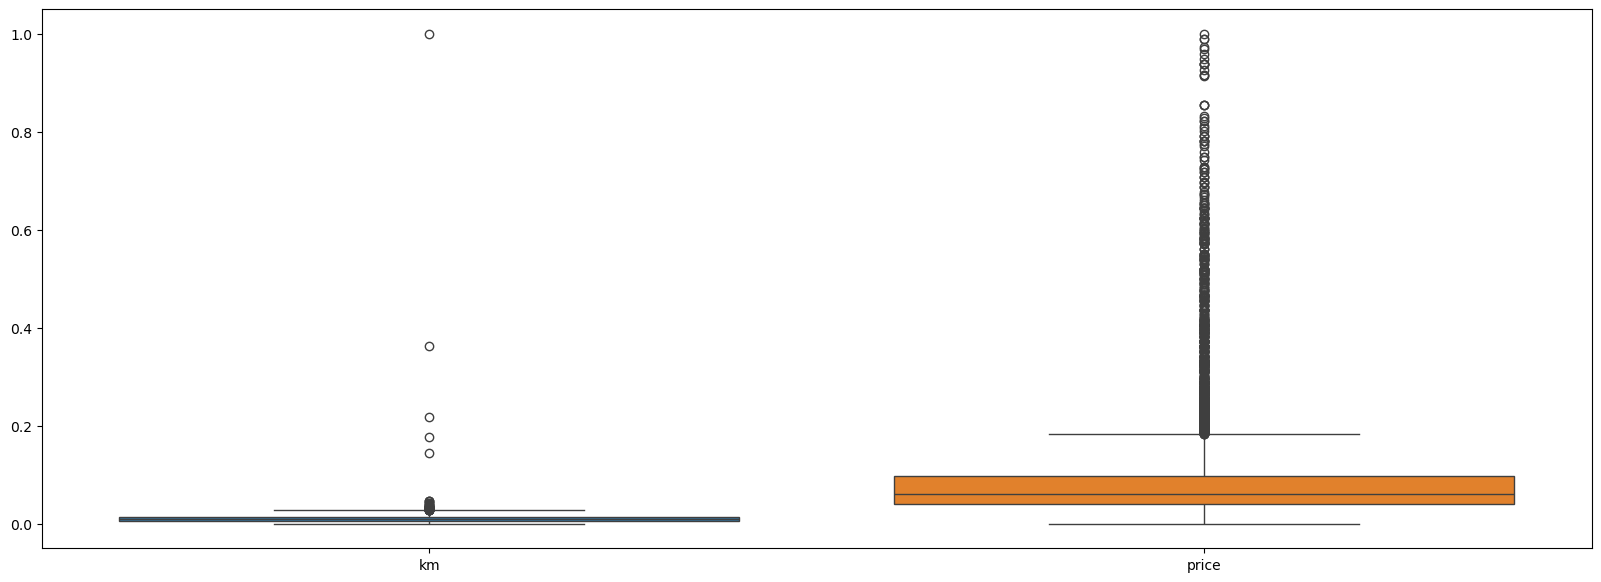

In [1044]:
plt.figure(figsize=(20,7))
sns.boxplot(data=final_df[["km","price"]])
plt.show()

In [1046]:
def outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR = q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    return df[(df[column]>=lower)&(df[column]<=upper)]
kilo =outliers(final_df,"km")
price=outliers(kilo,"price")
final_df=price

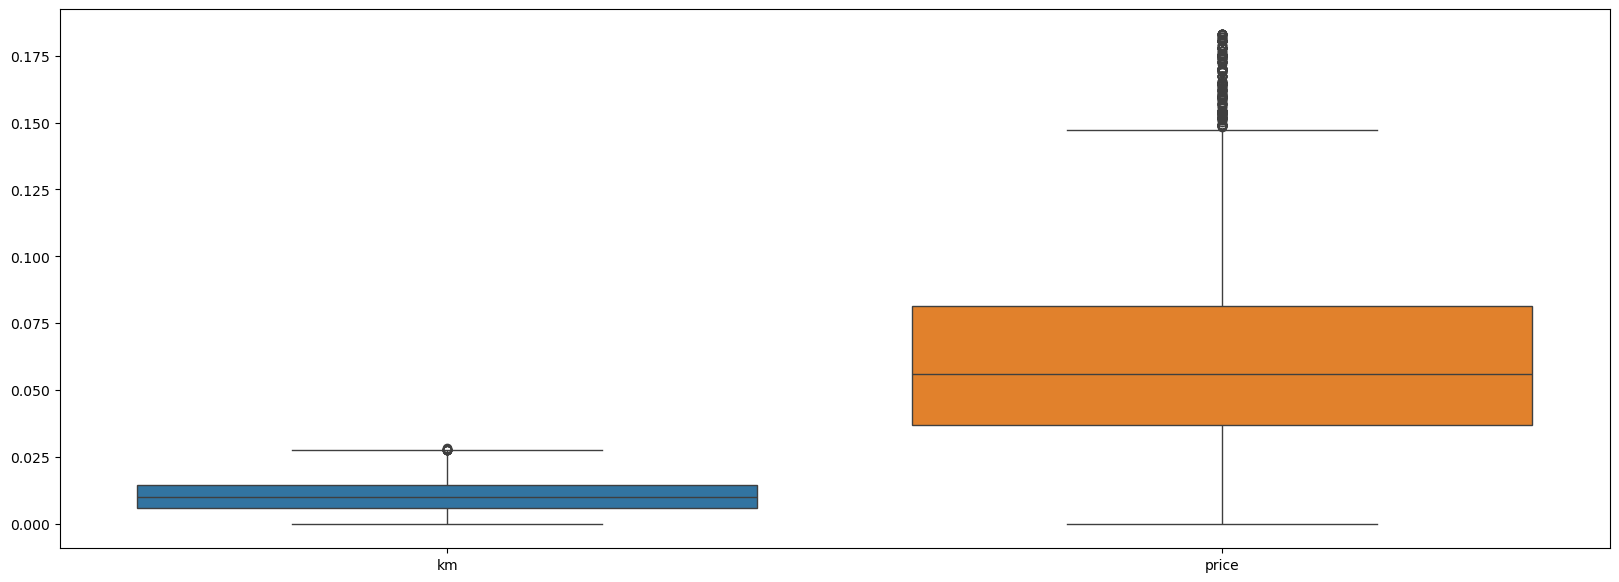

In [1048]:
plt.figure(figsize=(20,7))
sns.boxplot(data=final_df[["km","price"]])
plt.show()

In [1050]:
final_df[["km","price"]].describe()

,km,price
count,7467.000000,7467.000000
mean,0.010719,0.063461
std,0.005992,0.037384
min,0.000000,0.000000
25%,0.005937,0.037040
50%,0.010167,0.055830
75%,0.014545,0.081404
max,0.028169,0.183180


In [786]:
#saving the pre-processed file

In [1052]:
output_file= "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv"
final_df.to_csv(output_file,index=False)

# ONLY DATA CLEANING

In [1054]:
final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\338441427.py:1: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\final_df.csv")


In [1056]:
final_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_0_list_36_value,data_3_list_45_value,data_3_list_46_value,data_3_list_47_value,data_1_list_9_key,data_1_list_9_value.1,data_1_list_10_key,data_1_list_10_value.1,data_1_list_11_key,data_1_list_11_value.1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1058]:
final_df.shape

(8369, 325)

In [1060]:
final_df.isnull().mean()*100

it                         0.000000
ft                         0.000000
bt                         0.047795
km                         0.000000
transmission               0.000000
                            ...    
data_1_list_9_value.1     99.952205
data_1_list_10_key        99.952205
data_1_list_10_value.1    99.952205
data_1_list_11_key        99.952205
data_1_list_11_value.1    99.952205
Length: 325, dtype: float64

In [1062]:
#drop columns with more than 50% nan values
threshold=len(final_df) * 0.5
final_df=final_df.dropna(thresh=threshold, axis=1)

In [1064]:
final_df.shape

(8369, 215)

In [1066]:
# checking and treating missing values
final_df.isnull().sum()


it                           0
ft                           0
bt                           4
km                           0
transmission                 0
                          ... 
data_2_list_11_value.1    3918
top_5_key.1               3243
top_5_value.2             3243
car_links                    0
City                         0
Length: 215, dtype: int64

In [1068]:
final_df["bt"].value_counts()

bt
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [1070]:
final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\3221153751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["bt"].fillna(final_df["bt"].mode()[0],inplace=True)


In [1072]:
final_df["ownerNo"].isnull().sum()

0

In [1074]:
final_df["oem"].isnull().sum()

0

In [1076]:
final_df["model"].isnull().sum()

0

In [1078]:
final_df["modelYear"].isnull().sum()

0

In [822]:
final_df["variantName"].isnull().sum()

0

In [1080]:
final_df["top_1_value"].isnull().sum()

0

In [826]:
#coversion type for price

In [1082]:
def cov_price(price):
    try:
        price_s = str(price).replace("₹","").replace(",","").strip()
        if "Lakh" in price_s:
            return float(price_s.replace("Lakh","").strip())*100000
        return float(price_s)
    except ValueError:
        return np.nan

In [1084]:
final_df["price"] =final_df["price"].apply(cov_price)

In [1086]:
final_df["price"].isnull().sum()

20

In [1088]:
#filling missing value
final_df["price"].fillna(final_df["price"].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1865049444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["price"].fillna(final_df["price"].median(),inplace=True)


In [1090]:
final_df["price"].isnull().sum()

0

In [1092]:
#changing km into kms
final_df["km"] =final_df["km"].str.replace("kms","").str.replace(",","").astype(float)

In [1094]:
final_df["km"].isnull().sum()

0

In [1096]:
#clean mileage from top_0_value.2
def car_mileage(mileage):
    try:
        mileage_s = str(mileage).replace("kmpl","").replace("km/mg","").strip()
        mileage_float= float(mileage_s)
        if mileage_float <100:
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

In [1098]:
final_df["mileage"] =final_df["top_0_value.2"].apply(car_mileage)

In [1100]:
final_df["mileage"].isnull().mean()*100

3.847532560640459

In [1102]:
#replacing null value with mean value
final_df["mileage"].fillna(final_df["mileage"].mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\676305924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["mileage"].fillna(final_df["mileage"].mean(),inplace=True)


In [1104]:
final_df["mileage"].isnull().mean()*100

0.0

In [1106]:
#changing seat into int
def car_seats(seats):
    try:
        seat_s = re.search(r'\d+', str(seats))
        if seat_s:
            seats_int = int(seat_s.group())
            if seats_int < 10:
                return seats_int
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan
        

In [1108]:
final_df["seats"]=final_df["top_3_value"].apply(car_seats)

In [1110]:
final_df["seats"].value_counts()

seats
5.0    7309
7.0     731
6.0      99
4.0      92
8.0      61
9.0      11
1.0       9
2.0       7
Name: count, dtype: int64

In [1112]:
#replacing null value with mode value
final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12176\1965945630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["seats"].fillna(final_df["seats"].mode()[0], inplace=True)


In [1114]:
final_df["seats"].isnull().sum()

0

In [1116]:
#dropping top_3_value and top_0_value.2
final_df.drop(["top_3_value","top_0_value.2"],axis=1,inplace=True)

In [1118]:
# dropping the repeated column owner
final_df.drop("owner",axis=1,inplace=True)

In [1124]:
#changing column name
final_df["Insurance Validity"] =final_df["top_1_value"]

In [1126]:
final_df["Insurance Validity"]

0       Third Party insurance
1               Comprehensive
2               Comprehensive
3               Comprehensive
4       Third Party insurance
                ...          
8364    Third Party insurance
8365    Third Party insurance
8366    Third Party insurance
8367    Third Party insurance
8368    Third Party insurance
Name: Insurance Validity, Length: 8369, dtype: object

In [1128]:
#dropping column
final_df.drop("top_1_value",axis=1,inplace=True)

In [1130]:
final_df["Insurance Validity"].isnull().sum()

0

In [1132]:
output_file= "C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\data_cleaning.csv"
final_df.to_csv(output_file,index=False)

# DATA VISUALIZATION

In [35]:
processed_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_11536\3523466905.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  processed_df=pd.read_csv("C:\\Users\\admin\\python\\Car Dheko - Used Car Price Prediction\\pre-processed.csv")


In [37]:
processed_df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,seats,Insurance Validity
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.593993,0.5,8
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.367816,0.5,2
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.621431,0.5,2
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.445680,0.5,2
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.614386,0.5,8


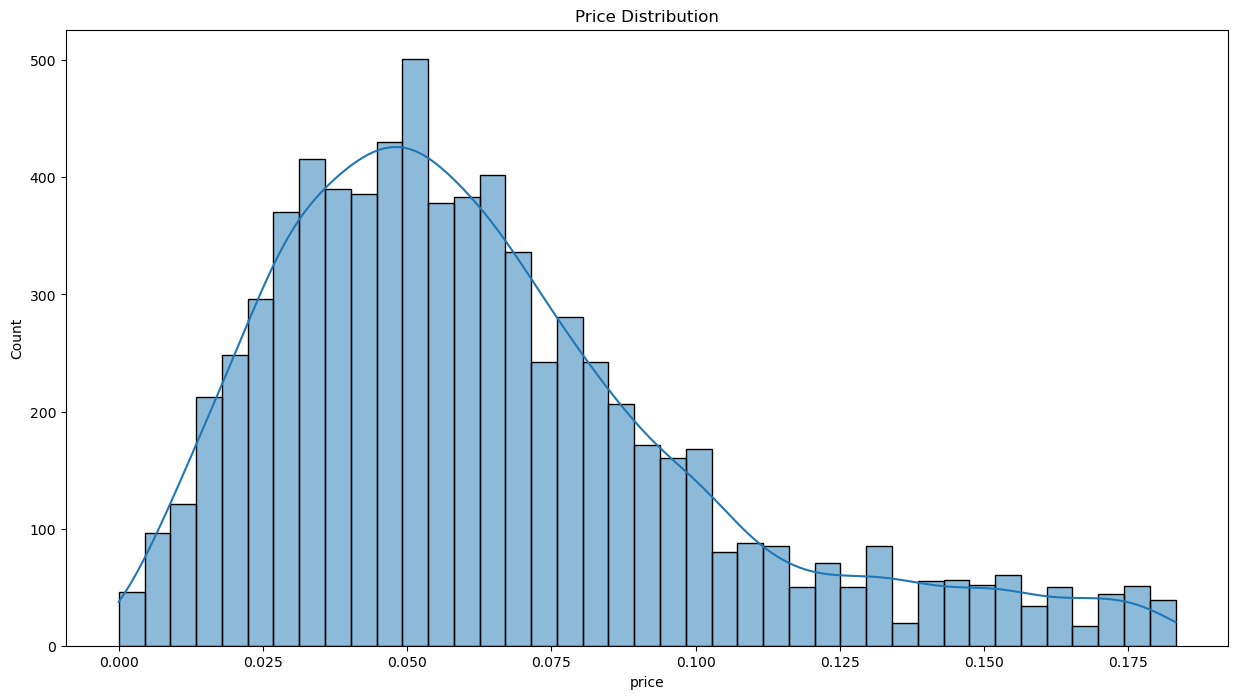

In [41]:
#histogram for price distribution
plt.figure(figsize=(15,8))
sns.histplot(processed_df["price"],kde=True)
plt.title("Price Distribution")
plt.show()


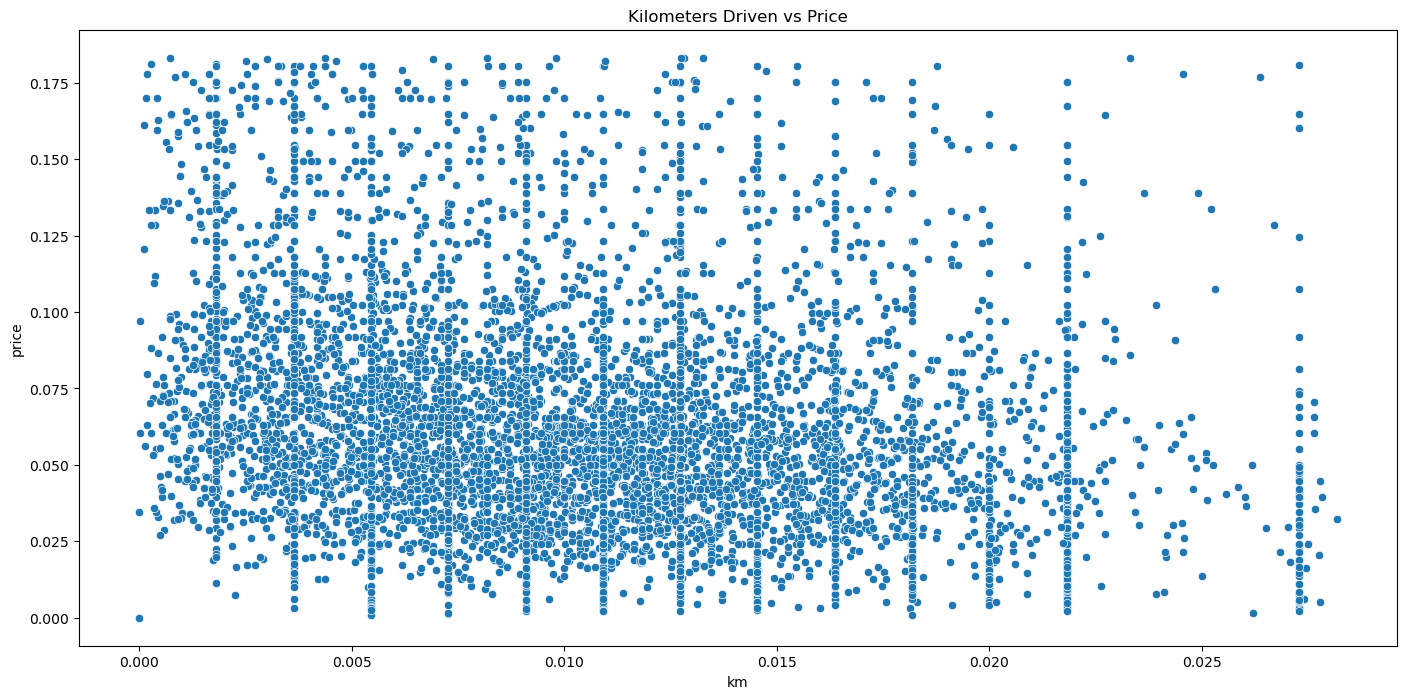

In [45]:
#scatterplot for km vs price
plt.figure(figsize=(17, 8))
sns.scatterplot(data=processed_df,x="km",y="price")
plt.title("Kilometers Driven vs Price")
plt.show()

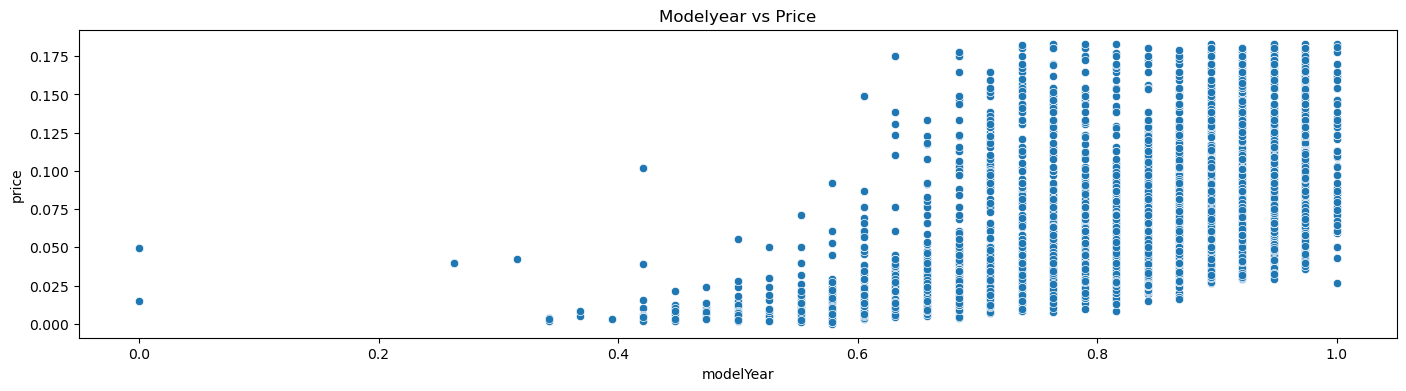

In [43]:
#modelyear vs Price
plt.figure(figsize=(17, 4))
sns.scatterplot(data=processed_df,x="modelYear",y="price")
plt.title("Modelyear vs Price")
plt.show()

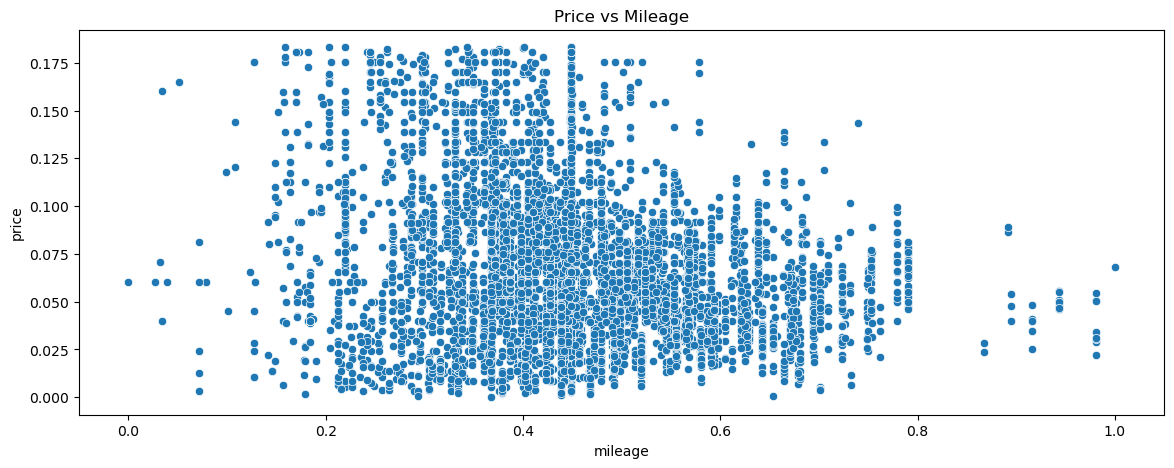

In [66]:
#scatterplot price vs mileage

plt.figure(figsize=(14, 5))
sns.scatterplot(data=processed_df,x="mileage", y="price",)
plt.title("Price vs Mileage")
plt.show()

In [76]:
#heatmap
data_corr =processed_df.select_dtypes(include=["int64","float64"])

In [90]:
data_corr= data_corr.corr()

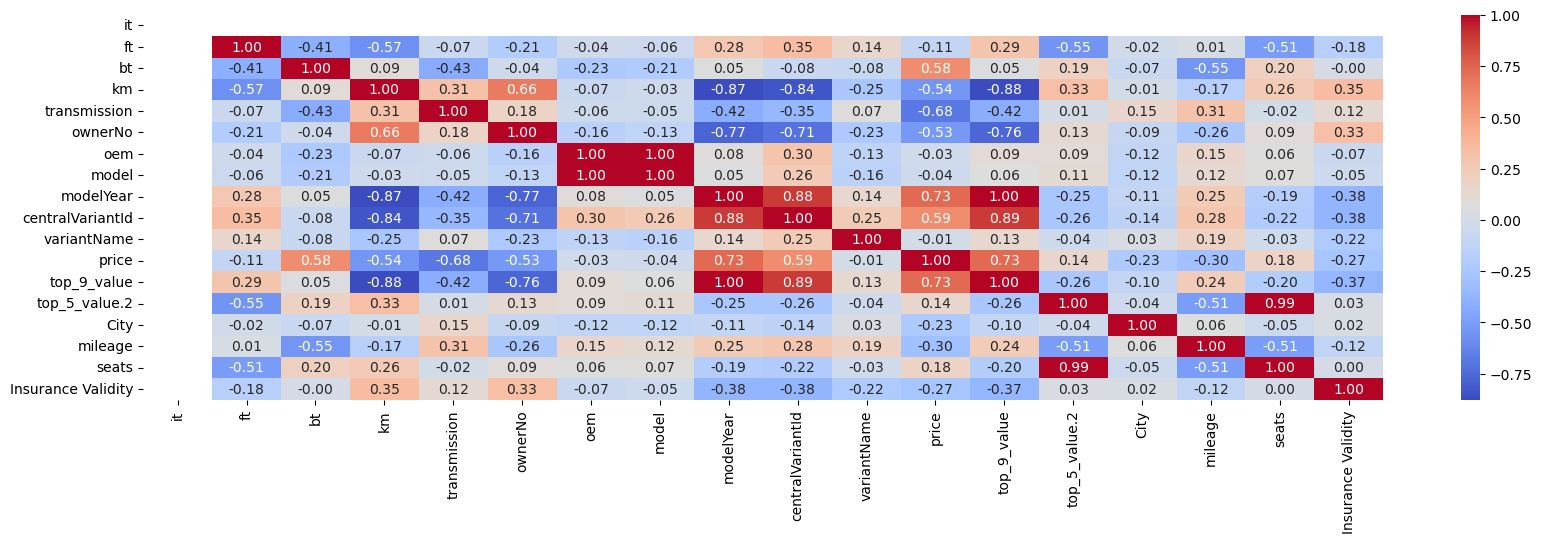

In [94]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_corr.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()